In [1]:
import pickle
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import math
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#opening the first version of the data
with open('total_players_2000.pkl', 'rb') as handle:
    wow = pickle.load(handle)

# Part 1: MVP

In [12]:
with open('first_regression_model.pkl', 'rb') as handle:
    fit = pickle.load(handle)

In [13]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MLB_AB   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 13 Apr 2020   Prob (F-statistic):          1.72e-117
Time:                        15:32:57   Log-Likelihood:                -21356.
No. Observations:                2385   AIC:                         4.272e+04
Df Residuals:                    2379   BIC:                         4.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4180.4092    581.367     -7.191      0.000   -5320.448   -3040.370
MINORS_R_per_AB   8929.1806   2322.171      3.845      0.000    4375.492    1.35e+04
MINORS_BB_per_AB  1086.7473   1417.077      0.767      0.443   -1692.085    3865.580
MINORS_SO_per_AB -5766.9991    886.027     -6.509      0.000   -7504.465   -4029.533
MINORS_BA         5776.8849   3661.998      1.578      0.115   -1404.152     1.3e+04
MINORS_OPS        4888.0947   1064.493      4.592      0.000    2800.664    6975.525
==============================================================================
Omnibus:                      856.699   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2765.312
Skew:                           1.835   Prob(JB):                         0.00
Kurtosis:                       6.789   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

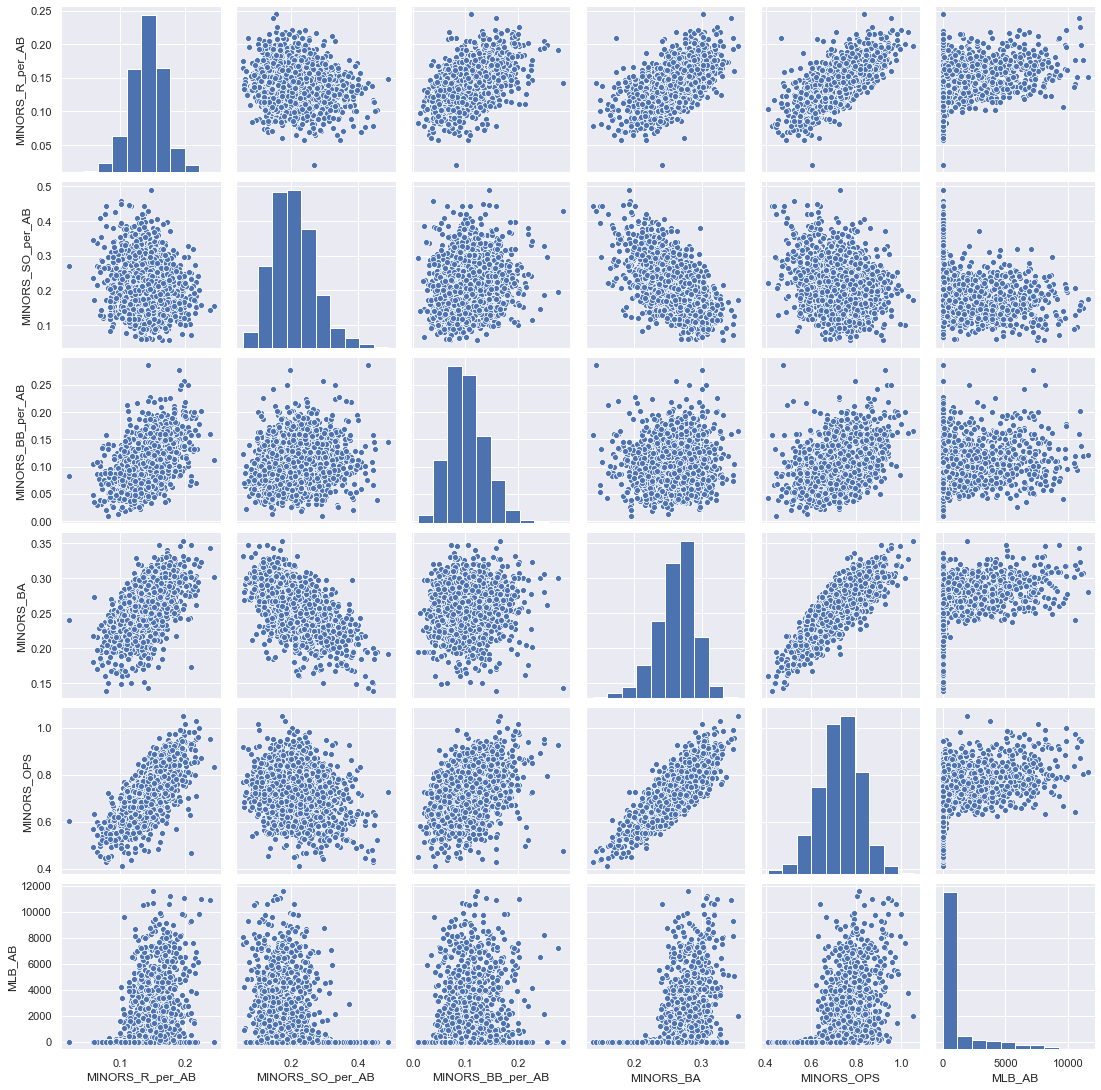

In [16]:
sns.pairplot(small_df)

### Taking out Batting Average because of the high p-value

In [3]:
y, X = patsy.dmatrices('MLB_AB ~ MINORS_R_per_AB + MINORS_BB_per_AB + MINORS_SO_per_AB + MINORS_OPS', data=wow, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit2 = model.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MLB_AB   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     155.1
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          4.48e-118
Time:                        13:35:39   Log-Likelihood:                -21357.
No. Observations:                2385   AIC:                         4.272e+04
Df Residuals:                    2380   BIC:                         4.275e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3469.2144    367.184     -9.448      0.000   -4189.248   -2749.180
MINORS_R_per_AB   9645.0786   2278.108      4.234      0.000    5177.796    1.41e+04
MINORS_BB_per_AB   125.5709   1279.801      0.098      0.922   -2384.068    2635.210
MINORS_SO_per_AB -6750.2014    629.955    -10.715      0.000   -7985.519   -5514.884
MINORS_OPS        6265.5712    609.030     10.288      0.000    5071.287    7459.856
==============================================================================
Omnibus:                      859.201   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2779.344
Skew:                           1.840   Prob(JB):                         0.00
Kurtosis:                       6.798   Cond. No.                         78.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Taking out Walks (BB_per_AB) because of the high p-value

In [4]:
y, X = patsy.dmatrices('MLB_AB ~ MINORS_R_per_AB + MINORS_SO_per_AB + MINORS_OPS', data=wow, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit3 = model.fit()

# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MLB_AB   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     206.9
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          2.88e-119
Time:                        13:35:43   Log-Likelihood:                -21357.
No. Observations:                2385   AIC:                         4.272e+04
Df Residuals:                    2381   BIC:                         4.275e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3475.1664    362.063     -9.598      0.000   -4185.158   -2765.175
MINORS_R_per_AB   9727.4404   2117.377      4.594      0.000    5575.346    1.39e+04
MINORS_SO_per_AB -6734.2062    608.369    -11.069      0.000   -7927.195   -5541.217
MINORS_OPS        6270.8198    606.550     10.339      0.000    5081.399    7460.241
==============================================================================
Omnibus:                      859.078   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2778.256
Skew:                           1.840   Prob(JB):                         0.00
Kurtosis:                       6.797   Cond. No.                         71.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fit3.save('mvp_regression_model.pkl')

# Part 2: Adding more features to the model

Ok now I've added these features:
1. Height
1. Weight
1. Debut Age
1. Draft Round
1. Went to College or not?
1. Position
1. Right, left handed, or both

Let's run a new basic model to see how everything looks

In [60]:
with open('dummy_df.pkl', 'rb') as handle:
    df = pickle.load(handle)

In [52]:
y, X = patsy.dmatrices('MLB_AB ~ MINORS_R_per_AB + MINORS_SO_per_AB + Debut_Age + Position_Second_Baseman + MINORS_OPS + Position_Third_Baseman + Position_First_Baseman + bmi + Draft + School + Position_Catcher + Position_Outfielder + Position_Shortstop + Bats_Both + Bats_Left + Bats_Right', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit4 = model.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MLB_AB   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     49.24
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          1.33e-106
Time:                        22:16:34   Log-Likelihood:                -10414.
No. Observations:                1153   AIC:                         2.086e+04
Df Residuals:                    1138   BIC:                         2.093e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6125.7171    825.867      7.417      0.000    4505.324    7746.110
MINORS_R_per_AB           1.54e+04   4684.937      3.288      0.001    6212.026    2.46e+04
MINORS_SO_per_AB        -1.172e+04   1219.938     -9.604      0.000   -1.41e+04   -9323.035
Debut_Age                -534.7419     29.519    -18.115      0.000    -592.661    -476.823
Position_Second_Baseman   883.1161    212.944      4.147      0.000     465.310    1300.923
MINORS_OPS               4979.5433   1495.676      3.329      0.001    2044.951    7914.136
Position_Third_Baseman    884.6360    218.145      4.055      0.000     456.624    1312.648
Position_First_Baseman   1194.1580    266.547      4.480      0.000     671.180    1717.136
bmi                        78.6239     28.003      2.808      0.005      23.681     133.566
Draft                     -10.9140      4.585     -2.380      0.017     -19.911      -1.917
School                    504.7711    153.002      3.299      0.001     204.573     804.969
Position_Catcher         1099.6303    201.205      5.465      0.000     704.856    1494.405
Position_Outfielder       875.1028    187.927      4.657      0.000     506.380    1243.826
Position_Shortstop       1189.0739    172.151      6.907      0.000     851.305    1526.843
Bats_Both                2134.8847    296.615      7.197      0.000    1552.911    2716.859
Bats_Left                1959.6236    292.310      6.704      0.000    1386.096    2533.151
Bats_Right               2031.2088    296.052      6.861      0.000    1450.339    2612.079
==============================================================================
Omnibus:                       89.109   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.398
Skew:                           0.739   Prob(JB):                     2.90e-24
Kurtosis:                       3.272   Cond. No.                     2.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
fit4.save('dummy_regression_model.pkl')

**Ok now I'm at least at a .370 R squared value. One interesting thing I noticed is that adding in Debut Age cuts the observations in half (of course because only half of the players made it to the MLB).**

**However, by adding in Debut_Age the R-suqared jumps from .245 to .381!!**

**So what does this mean?**
1. my model is way better at predicting MLB ABs given a player has some
1. Maybe this problem is really two problems mascarading as one. How many MLB ABs will some random Minor league player have? This is really two questions: Will they make the MLB and if they do how many ABs will they have?


**Update:** I tried adding more MLB players and it doesn't seem worth it unless I can add a whole lot more. So I think I should just take out players that don't have any MLB experience and then try Lasso/Ridge and see if I can get a better model

# Part 3: Normalizing my target variable:

**Ok so I normalized the MLB ABs let's check it out:**

In [77]:
with open('eda_ready_mlb.pkl', 'rb') as handle:
    mlb_df = pickle.load(handle)
    

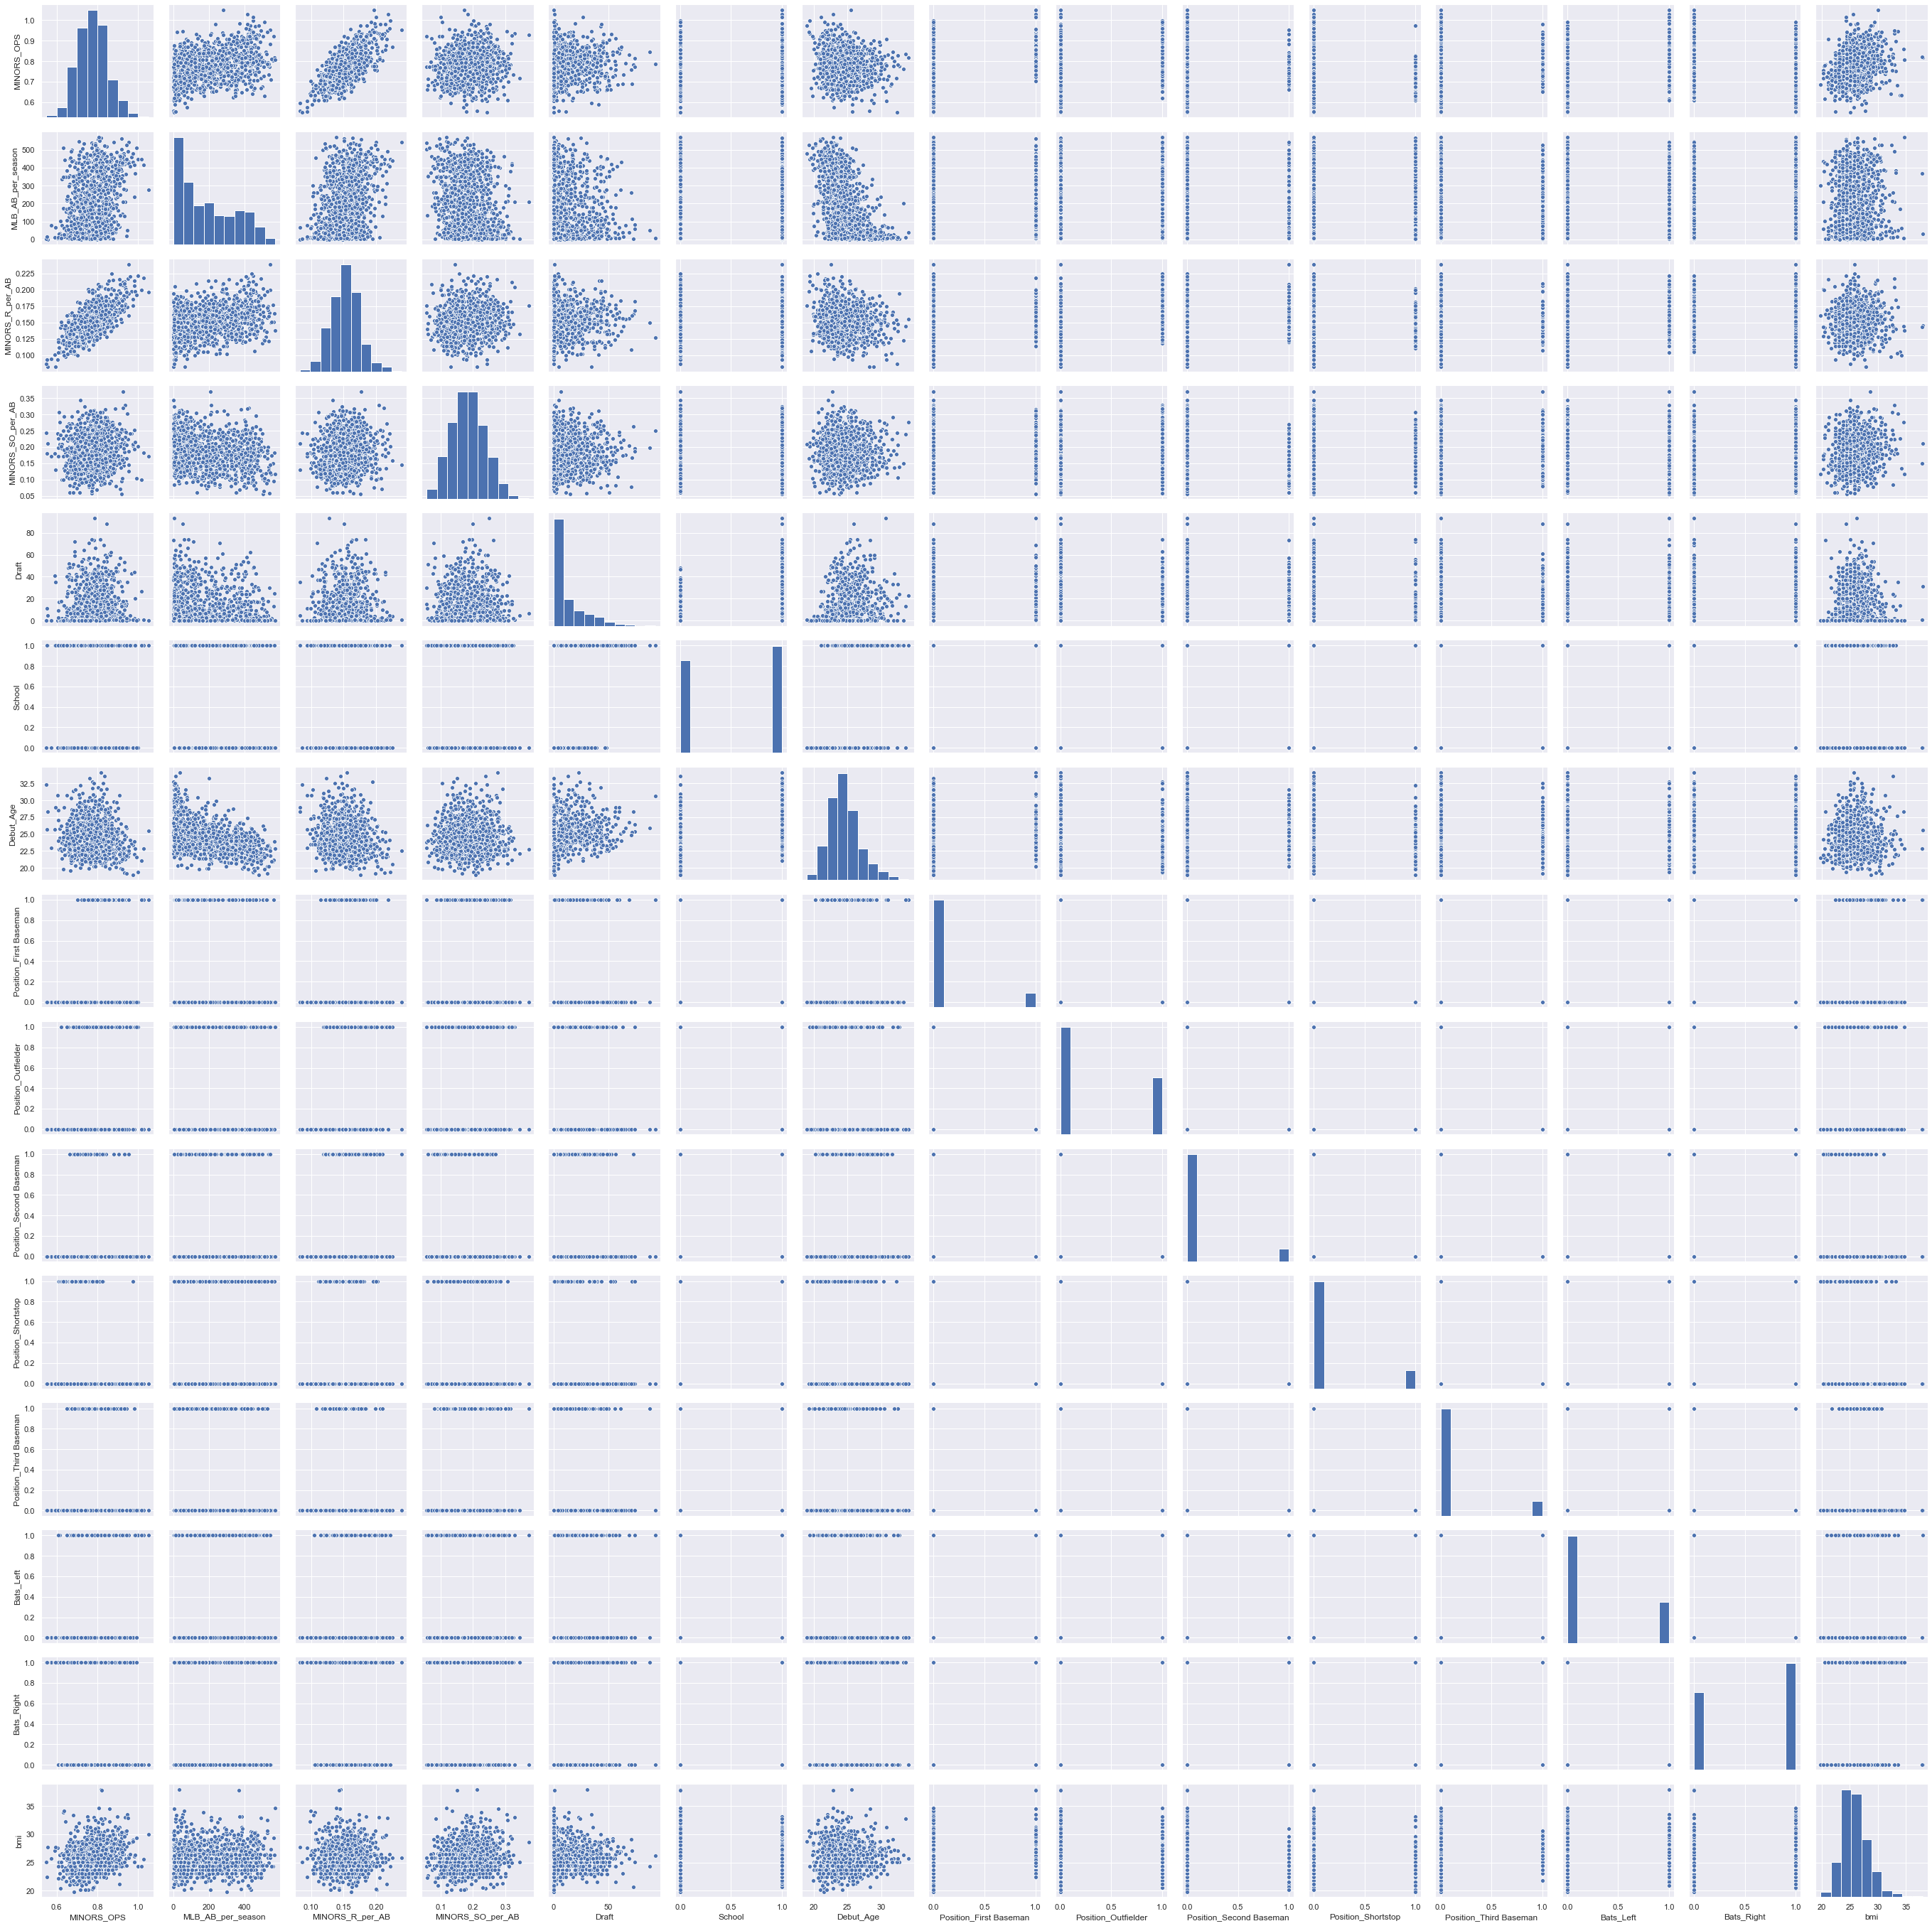

In [71]:
sns.pairplot(mlb_df)

Alright not too much has changed with the pairplot. Let's try a basic model and see if anything else looks different:

In [82]:
y, X = patsy.dmatrices('MLB_AB_per_season ~ MINORS_R_per_AB + MINORS_SO_per_AB + Debut_Age + Position_Catcher + Position_Second_Baseman + MINORS_OPS + Position_Third_Baseman + Position_First_Baseman + bmi + Draft + School + Position_Outfielder + Position_Shortstop + Bats_Both + Bats_Right + Bats_Left', data=mlb_df, return_type="dataframe")

# Create your model
model5 = sm.OLS(y, X)

# Fit your model to your training set
fit5 = model5.fit()

# Print summary statistics of the model's performance
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MLB_AB_per_season   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     49.05
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          3.50e-106
Time:                        16:50:14   Log-Likelihood:                -7158.6
No. Observations:                1150   AIC:                         1.435e+04
Df Residuals:                    1135   BIC:                         1.442e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 381.8836     49.901      7.653      0.000     283.974     479.793
MINORS_R_per_AB           755.3034    282.891      2.670      0.008     200.255    1310.352
MINORS_SO_per_AB         -757.6562     73.697    -10.281      0.000    -902.253    -613.059
Debut_Age                 -30.7016      1.785    -17.204      0.000     -34.203     -27.200
Position_Catcher           49.5271     12.151      4.076      0.000      25.687      73.367
Position_Second_Baseman    68.8758     12.901      5.339      0.000      43.564      94.188
MINORS_OPS                358.3769     90.395      3.965      0.000     181.017     535.737
Position_Third_Baseman     60.6607     13.203      4.594      0.000      34.756      86.566
Position_First_Baseman     70.1663     16.098      4.359      0.000      38.580     101.752
bmi                         4.3564      1.692      2.574      0.010       1.036       7.677
Draft                      -0.7181      0.277     -2.593      0.010      -1.261      -0.175
School                     34.1990      9.246      3.699      0.000      16.057      52.341
Position_Outfielder        60.4030     11.348      5.323      0.000      38.138      82.668
Position_Shortstop         72.2506     10.416      6.936      0.000      51.813      92.688
Bats_Both                 134.6618     17.914      7.517      0.000      99.514     169.810
Bats_Right                123.8586     17.895      6.921      0.000      88.747     158.970
Bats_Left                 123.3632     17.662      6.985      0.000      88.709     158.017
==============================================================================
Omnibus:                       45.576   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.988
Skew:                           0.323   Prob(JB):                     4.16e-08
Kurtosis:                       2.460   Cond. No.                     5.85e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
fit5.save('mlb_only_regressions.pkl')

In [85]:
#trying this with the normal MLB_AB target as well
with open('per_ab_mlb_eda_ready.pkl', 'rb') as handle:
    mlb2_df = pickle.load(handle)
    

In [86]:
y, X = patsy.dmatrices('MLB_AB ~ MINORS_R_per_AB + MINORS_SO_per_AB + Debut_Age + Position_Catcher + Position_Second_Baseman + MINORS_OPS + Position_Third_Baseman + Position_First_Baseman + bmi + Draft + School + Position_Outfielder + Position_Shortstop + Bats_Both + Bats_Right + Bats_Left', data=mlb2_df, return_type="dataframe")

# Create your model
model6 = sm.OLS(y, X)

# Fit your model to your training set
fit6 = model6.fit()

# Print summary statistics of the model's performance
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MLB_AB   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     48.93
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          5.81e-106
Time:                        17:06:20   Log-Likelihood:                -10388.
No. Observations:                1150   AIC:                         2.081e+04
Df Residuals:                    1135   BIC:                         2.088e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6130.7536    827.314      7.410      0.000    4507.517    7753.990
MINORS_R_per_AB          1.544e+04   4690.053      3.292      0.001    6238.377    2.46e+04
MINORS_SO_per_AB        -1.172e+04   1221.817     -9.589      0.000   -1.41e+04   -9318.922
Debut_Age                -535.3700     29.586    -18.095      0.000    -593.420    -477.320
Position_Catcher         1102.0070    201.445      5.471      0.000     706.760    1497.254
Position_Second_Baseman   890.0445    213.879      4.161      0.000     470.402    1309.687
MINORS_OPS               4987.9200   1498.658      3.328      0.001    2047.469    7928.371
Position_Third_Baseman    875.5766    218.891      4.000      0.000     446.099    1305.054
Position_First_Baseman   1194.3917    266.896      4.475      0.000     670.727    1718.057
bmi                        78.3962     28.058      2.794      0.005      23.344     133.448
Draft                     -10.9046      4.591     -2.375      0.018     -19.913      -1.896
School                    507.2458    153.297      3.309      0.001     206.469     808.023
Position_Outfielder       875.0619    188.131      4.651      0.000     505.938    1244.185
Position_Shortstop       1193.6719    172.693      6.912      0.000     854.838    1532.506
Bats_Both                2135.6557    296.992      7.191      0.000    1552.941    2718.370
Bats_Right               2033.5561    296.688      6.854      0.000    1451.438    2615.674
Bats_Left                1961.5419    292.818      6.699      0.000    1387.016    2536.067
==============================================================================
Omnibus:                       88.491   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.558
Skew:                           0.737   Prob(JB):                     4.41e-24
Kurtosis:                       3.266   Cond. No.                     5.85e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Nope! Nothing really changed by normalizing my target variable. If anything, the R squared went down a little. Ok on to regularization and validation!**

# Plots for Presentation

In [102]:
with open('per_season_mlb_eda_ready.pkl', 'rb') as handle:
    df18 = pickle.load(handle)

In [109]:
with open('full_feature_df.pkl', 'rb') as handle:
    df19 = pickle.load(handle)

In [115]:
current_df = df19[df19['MLB_AB'] > 0]

## Histogram of birth year for players in dataset

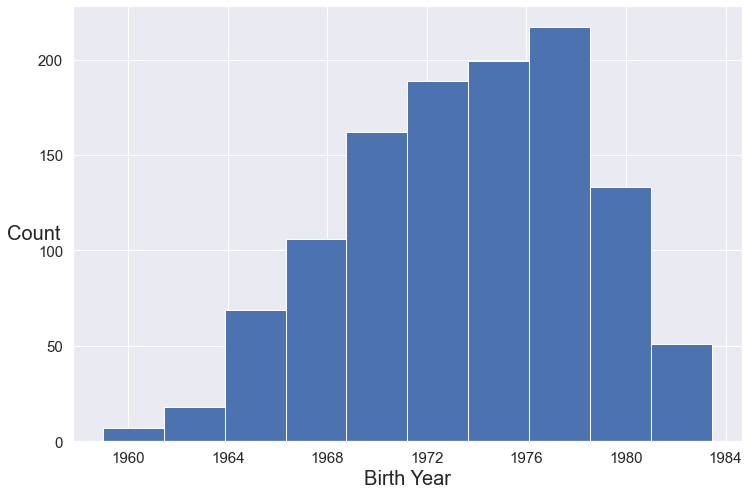

In [161]:
plt.figure(figsize=(12,8))
plt.hist(current_df['Born'])
plt.xlabel('Birth Year', fontsize=20)
plt.ylabel('Count', fontsize=20, rotation='horizontal', verticalalignment='top')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('birth_year_hist.png',format='png',bbox_inches='tight')

## Histogram of runs per AB for players in dataset

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

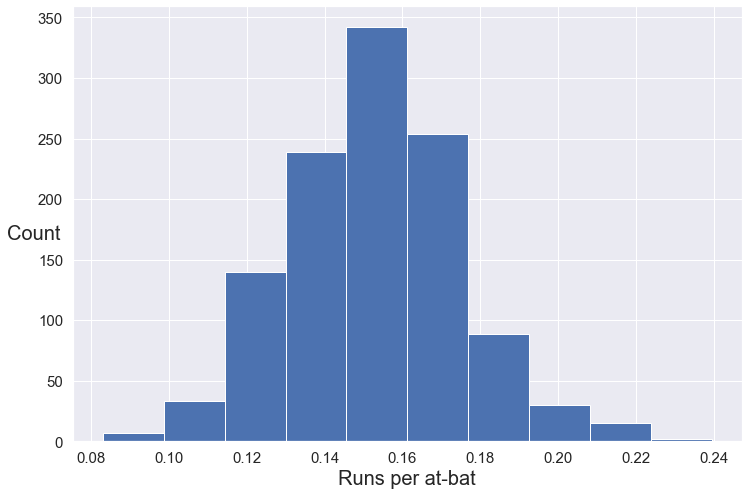

In [138]:
plt.figure(figsize=(12,8))
plt.hist(current_df['MINORS_R_per_AB'])
plt.xlabel('Runs per at-bat', fontsize=20)
plt.ylabel('Count', fontsize=20, rotation='horizontal', verticalalignment='top')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Histogram of strikeouts per AB for players in dataset

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

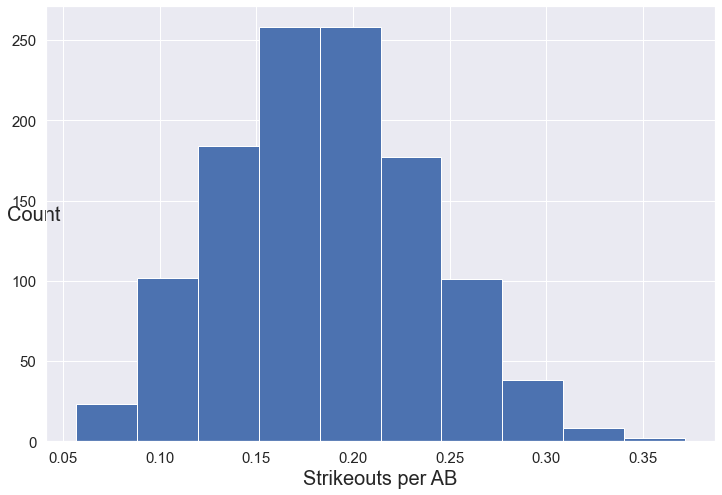

In [192]:
plt.figure(figsize=(12,8))
plt.hist(current_df['MINORS_SO_per_AB'])
plt.xlabel('Strikeouts per AB', fontsize=20)
plt.ylabel('Count', fontsize=20, rotation='horizontal', horizontalalignment='left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Chart showing the distribution of handedness in players

<BarContainer object of 3 artists>

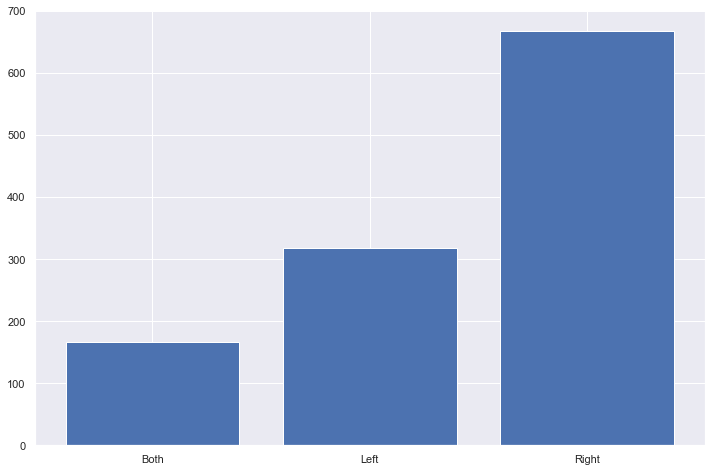

In [156]:
plt.figure(figsize=(12,8))
plt.bar(current_df.groupby(['Bats'])['player_name'].count().index,current_df.groupby(['Bats'])['player_name'].count())
#current_df.groupby(['Bats'])['player_name'].count()

## Chart showing the distribution of position in players

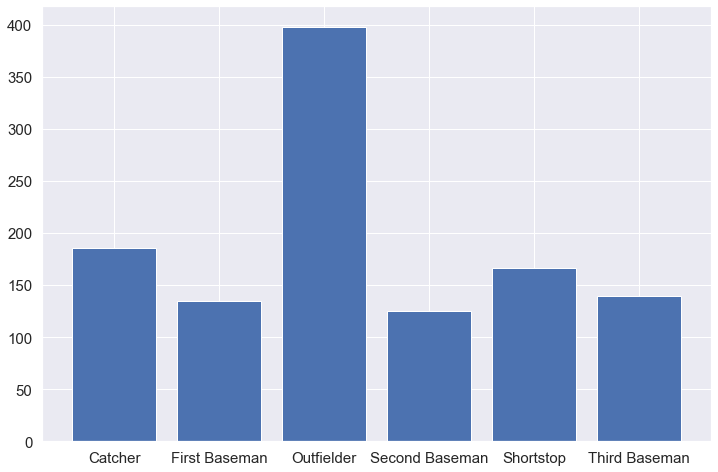

In [160]:
plt.figure(figsize=(12,8))
plt.bar(current_df.groupby(['Position'])['player_name'].count().index,current_df.groupby(['Position'])['player_name'].count())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('position_bar.png',format='png',bbox_inches='tight')

## Distribution of number of MLB ABs per player

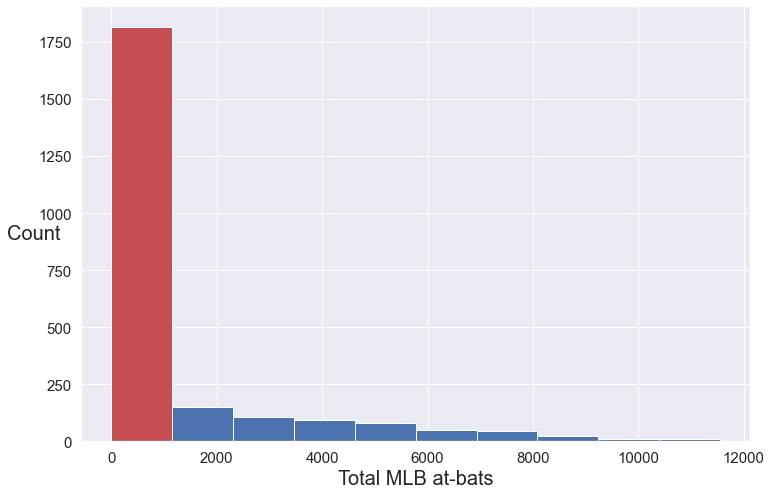

In [190]:
plt.figure(figsize=(12,8))
n,bins,patches = plt.hist(df19['MLB_AB'])
plt.xlabel('Total MLB at-bats', fontsize=20)
plt.ylabel('Count', fontsize=20, rotation='horizontal', verticalalignment='top')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
patches[0].set_facecolor('r')
plt.savefig('MLB_AB_hist.png',format='png',bbox_inches='tight')
